# Diffusion Model

**NOTE**: You will need to place this file on the same level as another folder named "*/dif_images*". ImageIO will not always create this folder automatically, so it may need to be created manually.

Running Simulation


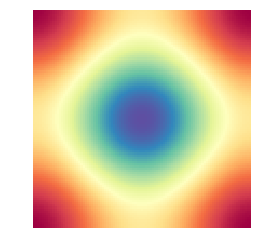

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
import imageio 

%matplotlib inline

images = []

def simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter):
    print("Running Simulation")
    start = time.time()

    # Run the simulation
    for iter in range(numIter):
        A_new = A + (dA * signal.convolve2d(A, lapl, mode='same', boundary='fill', fillvalue=0)) * dt
        B_new = B + (dB * signal.convolve2d(B, lapl, mode='same', boundary='fill', fillvalue=0)) * dt
        A = np.copy(A_new)
        B = np.copy(B_new)
        if (iter % plot_iter is 0):
            plt.clf()
            plt.imshow((B / (A+B)),cmap='Spectral')
            plt.axis('off')
            now = time.time()
            # print("Seconds since epoch =", now-start)
            # plt.show()
            filename = 'dif_images/diffusion_'+str(iter)+'.png'
            plt.savefig(filename)
            images.append(imageio.imread(filename))
    
    return A, B

# _*_*_*_*_*_*_*_*_* GRID PROPERTIES *_*_*_*_*_*_*_*_*_*
grid_size = 101 # Needs to be odd
numIter = 10000;
seed_size = 11 # Needs to be an odd number
A = np.ones((grid_size,grid_size))
B = np.zeros((grid_size,grid_size))

# Seed the predators
B[int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1, \
int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1] = \
np.ones((seed_size,seed_size))

# _*_*_*_*_*_*_*_*_* SIMULATION VARIABLES *_*_*_*_*_*_*_*_*_*
f = 0.055
k = 0.062
dt = 1.0
dA = 0.5
dB = 0.1
lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
plot_iter = 50

simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter)
imageio.mimsave('dif_images/0diffusion_movie.gif', images)
